In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing dataset from csv to data frame
df_traffic_data = pd.read_csv("C:/Users/anisb/OneDrive/Desktop/Metro_Interstate_Traffic_Volume.csv")

In [3]:
df_traffic_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
df_traffic_data.shape

(48204, 9)

In [5]:
df_traffic_data.dtypes

holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
traffic_volume           int64
dtype: object

In [6]:
df_traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


#### No null value is present in the data.

In [7]:
df_traffic_data.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [8]:
df_traffic_data.describe(include='object')

,holiday,weather_main,weather_description,date_time
count,61,48204,48204,48204
unique,11,11,38,40575
top,Labor Day,Clouds,sky is clear,2013-05-19 10:00:00
freq,7,15164,11665,6


In [9]:
print("max date :" +df_traffic_data.date_time.max())
print("min date :" +df_traffic_data.date_time.min())

max date :2018-09-30 23:00:00
min date :2012-10-02 09:00:00


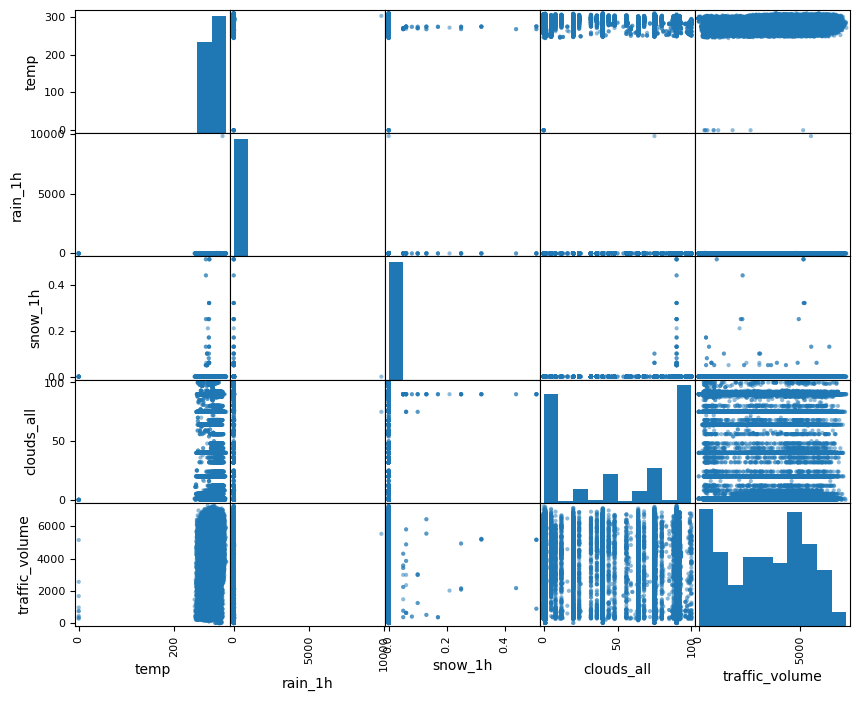

In [10]:
#Plotting relationship between temp, rain_1h, snow_1h, cloud_all.
num_vars = ['temp','rain_1h','snow_1h','clouds_all','traffic_volume']
from pandas.plotting import scatter_matrix
scatter_matrix(df_traffic_data[num_vars],figsize=(10,8))
plt.show()

### Feature engineering and Data cleaning

In [11]:
#copying data to new data frame
df_traffic_features = df_traffic_data.copy()

In [12]:
#Extracting features from date_time variable
df_traffic_features['date_time'] = pd.to_datetime(df_traffic_features.date_time)
df_traffic_features['weekday'] = df_traffic_features.date_time.dt.weekday
df_traffic_features['date'] = df_traffic_features.date_time.dt.date
df_traffic_features['hour'] = df_traffic_features.date_time.dt.hour
df_traffic_features['month'] = df_traffic_features.date_time.dt.month
df_traffic_features['year'] = df_traffic_features.date_time.dt.year
#Monday is 0 and Sunday is 6

In [13]:
df_traffic_features.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,2012-10-02,9,10,2012
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,2012-10-02,10,10,2012
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,2012-10-02,11,10,2012
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,2012-10-02,12,10,2012
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,2012-10-02,13,10,2012


In [14]:
#categorizing hours to different time periods like morning, afternoon etc
def hour_modify(x):
    Early_Morning = [4,5,6,7]
    Morning = [8,9,10,11]
    Afternoon = [12,13,14,15]
    Evening = [16,17,18,19]
    Night = [20,21,22,23]
    Late_Night = [24,1,2,3]
    if x in Early_Morning:
        return 'Early_Morning'
    elif x in Morning:
        return 'Morning'
    elif x in Afternoon:
        return 'Afternoon'
    elif x in Evening:
        return 'Evening'
    elif x in Night:
        return 'Night'
    else:
        return 'Late_Night'
    
df_traffic_features['hour'] = df_traffic_features.hour.map(hour_modify)

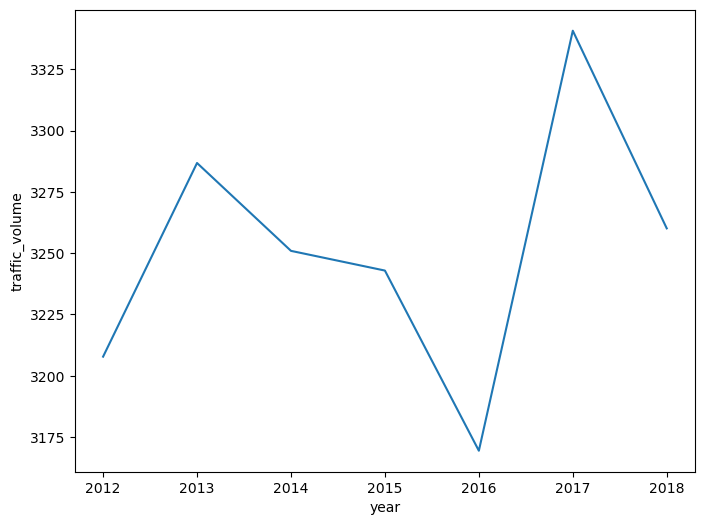

In [15]:
#aggreagating traffic volume over year and plotting 

df_date_traffic = df_traffic_features.groupby('year').aggregate({'traffic_volume':'mean'})
plt.figure(figsize=(8,6))
sns.lineplot(x = df_date_traffic.index, y = df_date_traffic.traffic_volume, data = df_date_traffic)
plt.show()

In [16]:
#Other holidays are very sparse compared to none holidays. 
#Hence encoding the holidays as TRUE and none Holidays as FALSE

def modify_holiday(x):
    if x == 'None':
        return False
    else:
        return True
df_traffic_features['holiday'] = df_traffic_features['holiday'].map(modify_holiday)

In [17]:
#Outlier in temp which was detected earlier needs to be removed
df_traffic_features = df_traffic_features.loc[df_traffic_features.temp>-250]

In [18]:
df_traffic_features['weather_description'] = df_traffic_features['weather_description'].map(lambda x:x.lower())

In [19]:
#Any row containing "thunderstorm" is replaced by "thunderstorm"
df_traffic_features.loc[df_traffic_features['weather_description'].str.contains('thunderstorm'),'weather_description'] = 'thunderstorm'    

In [20]:
weather = ['thunderstorm','mist','fog','haze']
df_traffic_features.loc[np.logical_not(df_traffic_features['weather_description'].isin(weather)),'weather_description'] = 'other'

In [21]:
#creating dummy variables for these newly created categories in weather description
df_traffic_features = pd.get_dummies(columns=['weather_description'],data=df_traffic_features)

In [22]:
df_traffic_features.rename(columns={'weather_description_fog':'fog', 'weather_description_haze':'haze',
                                   'weather_description_mist':'mist', 'weather_description_thunderstorm':'thunderstorm'}, inplace = True)
df_traffic_features.drop(columns = ['weather_description_other', 'weather_main'], inplace = True)

In [23]:
df_traffic_features.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'date_time',
       'traffic_volume', 'weekday', 'date', 'hour', 'month', 'year', 'fog',
       'haze', 'mist', 'thunderstorm'],
      dtype='object')

In [24]:
#Removing outlier in rain column and converting numeric data to categories
#rain value equal to 0.0 as no_rain
#rain value greater than 0.0 is cut into 3 quantiles

df_traffic_features = df_traffic_features.loc[df_traffic_features.rain_1h<2000]
df_traffic_features_temp = df_traffic_features.loc[df_traffic_features.rain_1h>0]
rain_q = pd.DataFrame(pd.qcut(df_traffic_features_temp['rain_1h'] ,q=3, labels=['light','moderate','heavy']))
df_traffic_cat = df_traffic_features.merge(rain_q,left_index=True, right_index=True, how='left')
df_traffic_cat['rain_1h_y'] = df_traffic_cat.rain_1h_y.cat.add_categories('no_rain')
df_traffic_cat['rain_1h_y'].fillna('no_rain', inplace = True) #no_rain is not in the category, adding it and filling

df_traffic_cat.drop(columns=['rain_1h_x'], inplace = True)
df_traffic_cat.rename(columns={'rain_1h_y':'rain_1h'}, inplace = True)
df_traffic_cat.head()

,holiday,temp,snow_1h,clouds_all,date_time,traffic_volume,weekday,date,hour,month,year,fog,haze,mist,thunderstorm,rain_1h
0,True,288.28,0.0,40,2012-10-02 09:00:00,5545,1,2012-10-02,Morning,10,2012,False,False,False,False,no_rain
1,True,289.36,0.0,75,2012-10-02 10:00:00,4516,1,2012-10-02,Morning,10,2012,False,False,False,False,no_rain
2,True,289.58,0.0,90,2012-10-02 11:00:00,4767,1,2012-10-02,Morning,10,2012,False,False,False,False,no_rain
3,True,290.13,0.0,90,2012-10-02 12:00:00,5026,1,2012-10-02,Afternoon,10,2012,False,False,False,False,no_rain
4,True,291.14,0.0,75,2012-10-02 13:00:00,4918,1,2012-10-02,Afternoon,10,2012,False,False,False,False,no_rain


In [25]:
def modify_snow1h(x):
    if x==0:
        return 'no_snow'
    else:
        return 'snow'
    
df_date_traffic['snow_1h'] = df_traffic_cat.snow_1h.map(modify_snow1h)

In [26]:
df_traffic_features.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,date_time,traffic_volume,weekday,date,hour,month,year,fog,haze,mist,thunderstorm
0,True,288.28,0.0,0.0,40,2012-10-02 09:00:00,5545,1,2012-10-02,Morning,10,2012,False,False,False,False
1,True,289.36,0.0,0.0,75,2012-10-02 10:00:00,4516,1,2012-10-02,Morning,10,2012,False,False,False,False
2,True,289.58,0.0,0.0,90,2012-10-02 11:00:00,4767,1,2012-10-02,Morning,10,2012,False,False,False,False
3,True,290.13,0.0,0.0,90,2012-10-02 12:00:00,5026,1,2012-10-02,Afternoon,10,2012,False,False,False,False
4,True,291.14,0.0,0.0,75,2012-10-02 13:00:00,4918,1,2012-10-02,Afternoon,10,2012,False,False,False,False


In [27]:
#setting date as index
df_traffic_cat.set_index('date', inplace = True)

In [28]:
df_traffic_cat.columns

Index(['holiday', 'temp', 'snow_1h', 'clouds_all', 'date_time',
       'traffic_volume', 'weekday', 'hour', 'month', 'year', 'fog', 'haze',
       'mist', 'thunderstorm', 'rain_1h'],
      dtype='object')

In [29]:
target = ['traffic_volume']
cat_vars = ['holiday', 'snow_1h','weekday', 'hour', 'month', 'year', 'fog', 'haze','mist', 'thunderstorm', 'rain_1h']
num_vars = ['temp','clouds_all']

In [30]:
#Creating pipeline to transform data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('oneHot',OneHotEncoder())])

preprocessor = ColumnTransformer(transformers=[
    ('num',numeric_transformer,num_vars),
    ('cat',categorical_transformer,cat_vars)])

df_traffic_transformed = preprocessor.fit_transform(df_traffic_cat).toarray()

In [ ]:
#Splitting data into train and test data

X_train = df_traffic_transformed[:32290]
X_test = df_traffic_transformed[32291:]
y_train = df_traffic_cat.traffic_volume[:32290]
y_test = df_traffic_cat.traffic_volume[32291:]

In [ ]:
#Fitting XGBoost regressor and parameter tuning using Grid search
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

tscv = TimeSeriesSplit(n_splits=3)
model = xgb.XGBRegressor()

param_grid = {'nthread':[4,6,8], 
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

GridSearch = GridSearchCV(estimator = model,param_grid= param_grid,cv=tscv, n_jobs = 2 )
GridSearch.fit(X_train, y_train)
y_pred = GridSearch.predict(X_test)

In [31]:
target = ['traffic_volume']
cat_vars = ['holiday', 'snow_1h','weekday', 'hour', 'month', 'year', 'fog', 'haze','mist', 'thunderstorm', 'rain_1h']
num_vars = ['temp','clouds_all']


In [32]:
import pickle
with open("C:/Users/anisb/Downloads/final_model.pkl", 'rb') as file:
    model = pickle.load(file)
    
# Fill in the values for example_to_predict (excluding the target variable 'traffic_volume')
example_to_predict = [True, 15.13, 0.0, 40, "2012-10-02 09:00:00",3000 ,1, "Morning", 10, 2012, 0, 0,0, 0, "no_rain"]

# Create a DataFrame from the example_to_predict with column names
example_df = pd.DataFrame([example_to_predict], columns=['holiday', 'temp', 'snow_1h', 'clouds_all', 'date_time',"traffic_volume", 'weekday', 'hour', 'month', 'year', 'fog', 'haze', 'mist', 'thunderstorm', 'rain_1h'])

# Preprocess the example data
example_transformed = preprocessor.transform(example_df).toarray()
example_transformed=[np.insert(example_transformed[0],0,1,axis=0)]
# Make predictions using the trained model
prediction = model.predict(example_transformed)

# Print or use the prediction as needed
print("Predicted Traffic Volume:", prediction)


Predicted Traffic Volume: [4910.2188]


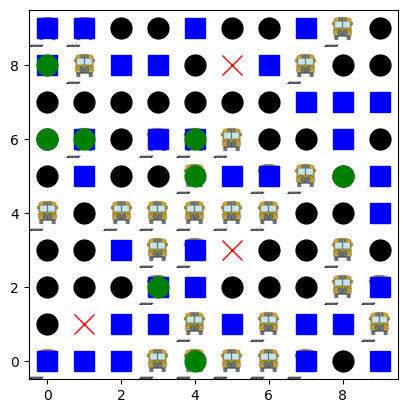

Passenger 1:
  Foot Steps = 3 steps
  Vehicle Steps = 0 steps
Passenger 2:
  Foot Steps = 3 steps
  Vehicle Steps = 0 steps
Passenger 3:
  Foot Steps = 2 steps
  Vehicle Steps = 0 steps
Passenger 4:
  Foot Steps = 3 steps
  Vehicle Steps = 0 steps
Passenger 5:
  Foot Steps = 3 steps
  Vehicle Steps = 0 steps
Passenger 6:
  Foot Steps = 3 steps
  Vehicle Steps = 0 steps
Passenger 7:
  Foot Steps = 3 steps
  Vehicle Steps = 0 steps
Passenger 8:
  Foot Steps = 3 steps
  Vehicle Steps = 0 steps


In [33]:
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output


class City:
    def __init__(self, size):
        self.size = size
        self.roads = [[0] * size for _ in range(size)]
        self.bus_stops = [(random.randint(0, size - 1), random.randint(0, size - 1)) for _ in range(40)]
        self.inaccessible_routes = set()


class PublicTransportVehicle:
    def __init__(self, route,position, inaccessible_routes):
        self.route = route
        self.next_stop = 0
        self.position = position
        self.inaccessible_routes = inaccessible_routes
        self.passengers=[]

    def move(self,city, num_positions_to_move):
        for _ in range(num_positions_to_move):
            if self.position!=self.route[self.next_stop]:
                       # Calculate the direction towards the destination
                delta_x = self.route[self.next_stop][0] - self.position[0]
                delta_y = self.route[self.next_stop][1] - self.position[1]

                # Move towards the destination or find an alternative route
                new_x, new_y = self.position[0], self.position[1]
                if delta_x != 0:
                    new_x += delta_x // abs(delta_x)
                elif delta_y != 0:
                    new_y += delta_y // abs(delta_y)

                # Check if the new position is within the city grid and accessible
                if 0 <= new_x < city.size and 0 <= new_y < city.size and (new_x, new_y) not in self.inaccessible_routes:
                    self.position = (new_x, new_y)
                else:
                    alternative_positions = [(x, y) for x in range(self.position[0]- 1, self.position[0]+ 2)
                                             for y in range(self.position[1]- 1,self.position[1] + 2)
                                             if 0 <= x < city.size and 0 <= y < city.size and (x, y) not in self.inaccessible_routes]
                    if alternative_positions:
                        self.position = random.choice(alternative_positions)
            else:
                self.next_stop = (self.next_stop + 1) % len(self.route)
                break
        
        

class Passenger:
    def __init__(self, origin, destination, inaccessible_routes):
        self.origin = origin
        self.destination = destination
        self.position = origin
        self.inaccessible_routes = inaccessible_routes
        self.BusTaken = False
        self.BusStartPosition=(-1,-1)
        self.Bus= None
        self.foot_steps = 0
        self.vehicle_steps = 0

    def move(self, city,vehicles, take_public_transport_probability=0.5):
        if self.position == self.destination:
            return  # Passenger has reached the destination, no need to move further

        current_x, current_y = self.position
        dest_x, dest_y = self.destination
        
        if self.BusTaken == True:
            self.vehicle_steps += 1
            return
        
        # Check if the passenger is on a bus stop
        if self.position in city.bus_stops:
            # Check if the passenger should take public transport
            matching_vehicles = [vehicle for vehicle in vehicles if (self.destination in vehicle.route) and (self.position==vehicle.position)]
            if matching_vehicles: #and random.random() < take_public_transport_probability:
                vehicle = random.choice(matching_vehicles)
                self.BusTaken = True
                self.Bus = vehicle
                #self.position = vehicle.position
                self.vehicle_steps += 1
                return  # Skip the walking part if taking public transport
        # Calculate the direction towards the destination
        delta_x = dest_x - current_x
        delta_y = dest_y - current_y
        
        self.foot_steps += 1
        
        # Move towards the destination or find an alternative route
        new_x, new_y = current_x, current_y
        if delta_x != 0:
            new_x += delta_x // abs(delta_x)
        elif delta_y != 0:
            new_y += delta_y // abs(delta_y)

        # Check if the new position is within the city grid and accessible if not find alternativeeee
        if 0 <= new_x < city.size and 0 <= new_y < city.size and (new_x, new_y) not in self.inaccessible_routes:
            self.position = (new_x, new_y)
        else:
            alternative_positions = [(x, y) for x in range(current_x - 1, current_x + 2)
                                     for y in range(current_y - 1, current_y + 2)
                                     if 0 <= x < city.size and 0 <= y < city.size and (x, y) not in self.inaccessible_routes]
            if alternative_positions:
                self.position = random.choice(alternative_positions)


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_city(city, vehicles, passengers, vehicle_image_path="C:/Users/anisb/OneDrive/Desktop/bus.jpg"):
    plt.cla()  # Clear the current axes

    # Plot roads
    for i in range(city.size):
        for j in range(city.size):
            if (i, j) in city.bus_stops:
                plt.plot(i, j, 'bs', markersize=15)  # Blue square for bus stops
                if (i, j) in city.inaccessible_routes:
                    plt.plot(i, j, 'rx', markersize=15)  # Red 'X' for inaccessible routes
            elif (i, j) in city.inaccessible_routes:
                plt.plot(i, j, 'rx', markersize=15)  # Red 'X' for inaccessible routes
            elif any((vehicle.position == (i, j)) for vehicle in vehicles):
                pass
            else:
                plt.plot(i, j, 'ko', markersize=15)  # Black circle for roads

    # Plot vehicles
    vehicle_img = mpimg.imread(vehicle_image_path)
    for vehicle in vehicles:
        plt.imshow(vehicle_img, extent=(vehicle.position[0] - 0.5, vehicle.position[0] + 0.5,
                                       vehicle.position[1] - 0.5, vehicle.position[1] + 0.5))

    # Plot passengers
    for passenger in passengers:
        plt.plot(passenger.position[0], passenger.position[1], 'go', markersize=15)  # Green circle for passengers

    plt.draw()
    plt.pause(4)  # Pause to allow time for the plot to update

def simulate(city_size, num_vehicles, num_passengers, num_steps):
    city = City(city_size)
    # Create vehicles with random routes and timetable
    vehicles = []
    for _ in range(num_vehicles):
        start_stop = random.choice(city.bus_stops)
        timetable = random.sample(city.bus_stops, len(city.bus_stops))
        vehicle = PublicTransportVehicle(route= timetable, position=start_stop,
                                         inaccessible_routes=city.inaccessible_routes)
        vehicles.append(vehicle)

    # Create passengers with random origins and destinations
    passengers = [Passenger(
        (random.randint(0, city_size - 1), random.randint(0, city_size - 1)),
        (random.randint(0, city_size - 1), random.randint(0, city_size - 1)),
        city.inaccessible_routes
    ) for _ in range(num_passengers)]

    for step in range(num_steps):
        clear_output(wait=True)
        if step != num_steps-1:
            for i, passenger in enumerate(passengers):
                print(f"Passenger {i + 1}:")
                print(f"  Foot Steps = {passenger.foot_steps} steps")
                print(f"  Vehicle Steps = {passenger.vehicle_steps} steps")
        # Introduce disturbances by blocking some roads
        blocked_route = (random.randint(0, city_size - 1), random.randint(0, city_size - 1))
        city.inaccessible_routes.add(blocked_route)

        # Move vehicles
        for vehicle in vehicles:
            if prediction[0]<2000:
                vehicle_max_speed=6
            elif prediction[0]<4000:
                vehicle_max_speed=4
            else:
                vehicle_max_speed=2
            num_positions_to_move = random.randint(1, vehicle_max_speed)
            vehicle.move(city,num_positions_to_move)
            for passenger in vehicle.passengers:
                passenger.position=vehicle.position
                for p in passengers:
                    if p == passenger:
                        p.position=passenger.position
                if passenger.position== passenger.destination:
                    vehicle.passengers.remove(passenger)

        # Update passenger positions based on their individual move method
        for passenger in passengers:
            passenger.move(city,vehicles)
            if passenger.BusTaken == True:
                for vehicle in vehicles:
                    if (vehicle.route == passenger.Bus.route) and (passenger.BusStartPosition==(-1,-1)):
                        vehicle.passengers.append(passenger)
                        passenger.BusStartPosition=passenger.position
        plot_city(city, vehicles, passengers)  # Remove plt.gca() from the arguments
    
        for i, passenger in enumerate(passengers):
            print(f"Passenger {i + 1}:")
            print(f"  Foot Steps = {passenger.foot_steps} steps")
            print(f"  Vehicle Steps = {passenger.vehicle_steps} steps")

# Example usage
simulate(city_size=10, num_vehicles=40, num_passengers=8, num_steps=3)
